# Veri Madenciliği ve Makine Öğrenmesi Algoritmaları
## 11 Aralık 2024
### BGT2 Şebinkarahisar

###Karar Ağacı Algoritmaları

Öğr. Gör. Süleyman EZDEMİR

In [49]:
# Gerekli kütüphaneleri yükleyelim
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import classification_report, accuracy_score

Pandas kütüphanesi ile internet ortamından csv dosyası okunabilir. sep parametresi de verilerin birbirinden ayrılırken hangi karakter ile ayrıldığını belirtmek kullanılır.

In [50]:
# Veri setini yükleme
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=";")


In [51]:
# Bağımsız (X) ve bağımlı (y) değişkenleri ayıralım
X = data.drop("quality", axis=1)
y = data["quality"]

In [52]:
# Veriyi egitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [62]:
# Karar ağacı modelini oluşturalım
model = DecisionTreeClassifier(random_state=3, max_depth=15)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=3)

In [63]:
# Modelin performansını değerlendirme
y_pred = model.predict(X_test)

In [64]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5541666666666667

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.21      0.21      0.21        14
           5       0.58      0.63      0.61       177
           6       0.61      0.54      0.57       221
           7       0.43      0.51      0.47        59
           8       0.25      0.29      0.27         7

    accuracy                           0.55       480
   macro avg       0.35      0.36      0.35       480
weighted avg       0.56      0.55      0.55       480



In [65]:
# Karar ağacını metin formatında görüntüleme
tree_rules = export_text(model, feature_names=list(X.columns))
print("\nDecision Tree Rules:\n")
print(tree_rules)


Decision Tree Rules:

|--- alcohol <= 10.53
|   |--- sulphates <= 0.57
|   |   |--- alcohol <= 9.75
|   |   |   |--- total sulfur dioxide <= 58.00
|   |   |   |   |--- volatile acidity <= 0.97
|   |   |   |   |   |--- residual sugar <= 4.30
|   |   |   |   |   |   |--- total sulfur dioxide <= 42.50
|   |   |   |   |   |   |   |--- volatile acidity <= 0.33
|   |   |   |   |   |   |   |   |--- fixed acidity <= 8.80
|   |   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |   |   |--- fixed acidity >  8.80
|   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |--- volatile acidity >  0.33
|   |   |   |   |   |   |   |   |--- volatile acidity <= 0.73
|   |   |   |   |   |   |   |   |   |--- total sulfur dioxide <= 41.50
|   |   |   |   |   |   |   |   |   |   |--- sulphates <= 0.56
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- sulphates >  0.56
|   |   |   |   |   |   |   |

In [66]:
from sklearn import tree

[Text(0.5377314951559546, 0.96875, 'x[10] <= 10.525\ngini = 0.641\nsamples = 1119\nvalue = [8.0, 39.0, 504.0, 417.0, 140.0, 11.0]'),
 Text(0.301460597826087, 0.90625, 'x[9] <= 0.575\ngini = 0.529\nsamples = 702\nvalue = [6.0, 26.0, 431.0, 212.0, 25.0, 2.0]'),
 Text(0.4195960464910208, 0.9375, 'True  '),
 Text(0.14527705576559546, 0.84375, 'x[10] <= 9.75\ngini = 0.389\nsamples = 291\nvalue = [3, 17, 222, 46, 3, 0]'),
 Text(0.10955222117202268, 0.78125, 'x[6] <= 58.0\ngini = 0.279\nsamples = 191\nvalue = [2, 10, 161, 17, 1, 0]'),
 Text(0.09056001890359168, 0.71875, 'x[1] <= 0.965\ngini = 0.394\nsamples = 106\nvalue = [2, 10, 81, 12, 1, 0]'),
 Text(0.07525992438563327, 0.65625, 'x[3] <= 4.3\ngini = 0.373\nsamples = 104\nvalue = [1, 10, 81, 11, 1, 0]'),
 Text(0.05600189035916824, 0.59375, 'x[6] <= 42.5\ngini = 0.352\nsamples = 102\nvalue = [1, 9, 81, 10, 1, 0]'),
 Text(0.028827977315689982, 0.53125, 'x[1] <= 0.33\ngini = 0.273\nsamples = 78\nvalue = [0, 7, 66, 4, 1, 0]'),
 Text(0.017013232

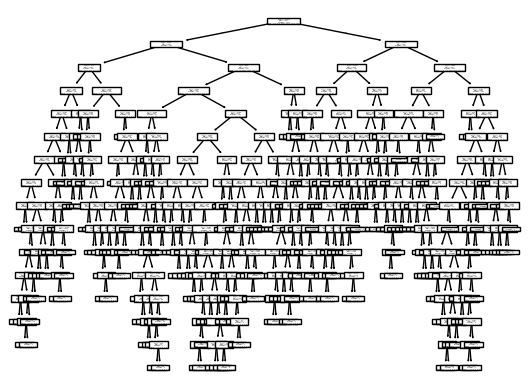

In [67]:
tree.plot_tree(model)

In [59]:
from sklearn.model_selection import GridSearchCV

In [61]:
agac = DecisionTreeClassifier()
param_grid={'max_depth':range(1,20)}
grid_search=GridSearchCV(agac,param_grid,cv=5)
grid_search.fit(X_train, y_train)
print("En iyi sonuc:", grid_search.best_params_['max_depth'])

En iyi sonuc: 15
